In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Business Goal:
Build a predictive model to identify who would cancel hotel booking

In [4]:
raw_df = pd.read_excel('/content/hotel.xlsx')

In [5]:
raw_df.head()

,LeadTime,Meal,Country,IsRepeatedGuest,DaysInWaitingList,ReservedRoomType,BookingChanges,CustomerType,TotalOfSpecialRequests,IsCanceled
0,228,bb,USA,1,18,e,0,group,3,0
1,315,hb,PRT,0,12,c,6,group,11,1
2,125,fb,OMN,1,25,c,4,contract,7,1
3,358,no meal,CHE,1,27,c,1,transient,11,1
4,174,no meal,ESP,0,22,d,3,transient,2,1


In [8]:
raw_df.shape

(2001, 10)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LeadTime                2001 non-null   int64 
 1   Meal                    2001 non-null   object
 2   Country                 1978 non-null   object
 3   IsRepeatedGuest         2001 non-null   int64 
 4   DaysInWaitingList       2001 non-null   int64 
 5   ReservedRoomType        2001 non-null   object
 6   BookingChanges          2001 non-null   int64 
 7   CustomerType            2001 non-null   object
 8   TotalOfSpecialRequests  2001 non-null   int64 
 9   IsCanceled              2001 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 156.5+ KB


In [9]:
raw_df.isnull().sum()

,0
LeadTime,0
Meal,0
Country,23
IsRepeatedGuest,0
DaysInWaitingList,0
ReservedRoomType,0
BookingChanges,0
CustomerType,0
TotalOfSpecialRequests,0
IsCanceled,0


In [10]:
raw_df.dropna(inplace=True)

In [13]:
raw_df.describe()

,LeadTime,IsRepeatedGuest,DaysInWaitingList,BookingChanges,TotalOfSpecialRequests,IsCanceled
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,306.425683,0.505561,16.733064,4.447422,5.984833,0.589484
std,173.961030,0.500096,9.793855,2.881317,3.826772,0.492052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,0.000000,8.000000,2.000000,3.000000,0.000000
50%,313.500000,1.000000,17.000000,4.000000,6.000000,1.000000
75%,457.750000,1.000000,25.000000,7.000000,9.000000,1.000000
max,600.000000,1.000000,33.000000,9.000000,12.000000,1.000000


In [14]:
raw_df.duplicated().sum()

0

# Visualizations

In [15]:
raw_df.columns

Index(['LeadTime', 'Meal', 'Country', 'IsRepeatedGuest', 'DaysInWaitingList',
       'ReservedRoomType', 'BookingChanges', 'CustomerType',
       'TotalOfSpecialRequests', 'IsCanceled'],
      dtype='object')

In [18]:
raw_df.head()

,LeadTime,Meal,Country,IsRepeatedGuest,DaysInWaitingList,ReservedRoomType,BookingChanges,CustomerType,TotalOfSpecialRequests,IsCanceled
0,228,bb,USA,1,18,e,0,group,3,0
1,315,hb,PRT,0,12,c,6,group,11,1
2,125,fb,OMN,1,25,c,4,contract,7,1
3,358,no meal,CHE,1,27,c,1,transient,11,1
4,174,no meal,ESP,0,22,d,3,transient,2,1


In [19]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.IsCanceled.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
Index: 1978 entries, 0 to 2000
Series name: IsCanceled
Non-Null Count  Dtype   
--------------  -----   
1978 non-null   category
dtypes: category(1)
memory usage: 82.0 KB
None


In [21]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'IsCanceled' )
X_features.remove( 'Country' )

In [22]:
print(X_features)

['LeadTime', 'Meal', 'IsRepeatedGuest', 'DaysInWaitingList', 'ReservedRoomType', 'BookingChanges', 'CustomerType', 'TotalOfSpecialRequests']


In [23]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]

In [24]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1384 entries, 568 to 876
Series name: IsCanceled
Non-Null Count  Dtype   
--------------  -----   
1384 non-null   category
dtypes: category(1)
memory usage: 12.3 KB
None


In [25]:
raw_df.select_dtypes(include='object').columns

Index(['Meal', 'Country', 'ReservedRoomType', 'CustomerType'], dtype='object')

In [26]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['Meal', 'ReservedRoomType', 'CustomerType']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [27]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1384 entries, 568 to 876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   LeadTime                1384 non-null   int64
 1   IsRepeatedGuest         1384 non-null   int64
 2   DaysInWaitingList       1384 non-null   int64
 3   BookingChanges          1384 non-null   int64
 4   TotalOfSpecialRequests  1384 non-null   int64
 5   Meal_fb                 1384 non-null   int64
 6   Meal_hb                 1384 non-null   int64
 7   Meal_no meal            1384 non-null   int64
 8   ReservedRoomType_b      1384 non-null   int64
 9   ReservedRoomType_c      1384 non-null   int64
 10  ReservedRoomType_d      1384 non-null   int64
 11  ReservedRoomType_e      1384 non-null   int64
 12  ReservedRoomType_f      1384 non-null   int64
 13  CustomerType_group      1384 non-null   int64
 14  CustomerType_transient  1384 non-null   int64
dtypes: int64(15)
memory usage

In [28]:
X_train_encoded.head()

,LeadTime,IsRepeatedGuest,DaysInWaitingList,BookingChanges,TotalOfSpecialRequests,Meal_fb,Meal_hb,Meal_no meal,ReservedRoomType_b,ReservedRoomType_c,ReservedRoomType_d,ReservedRoomType_e,ReservedRoomType_f,CustomerType_group,CustomerType_transient
568,195,1,3,4,7,0,0,0,0,0,1,0,0,1,0
1712,557,1,1,8,7,0,1,0,0,0,1,0,0,0,0
71,120,0,16,9,12,0,0,0,0,1,0,0,0,0,1
990,520,1,25,8,9,0,1,0,0,1,0,0,0,1,0
1019,533,1,3,7,3,0,0,1,0,0,0,1,0,1,0


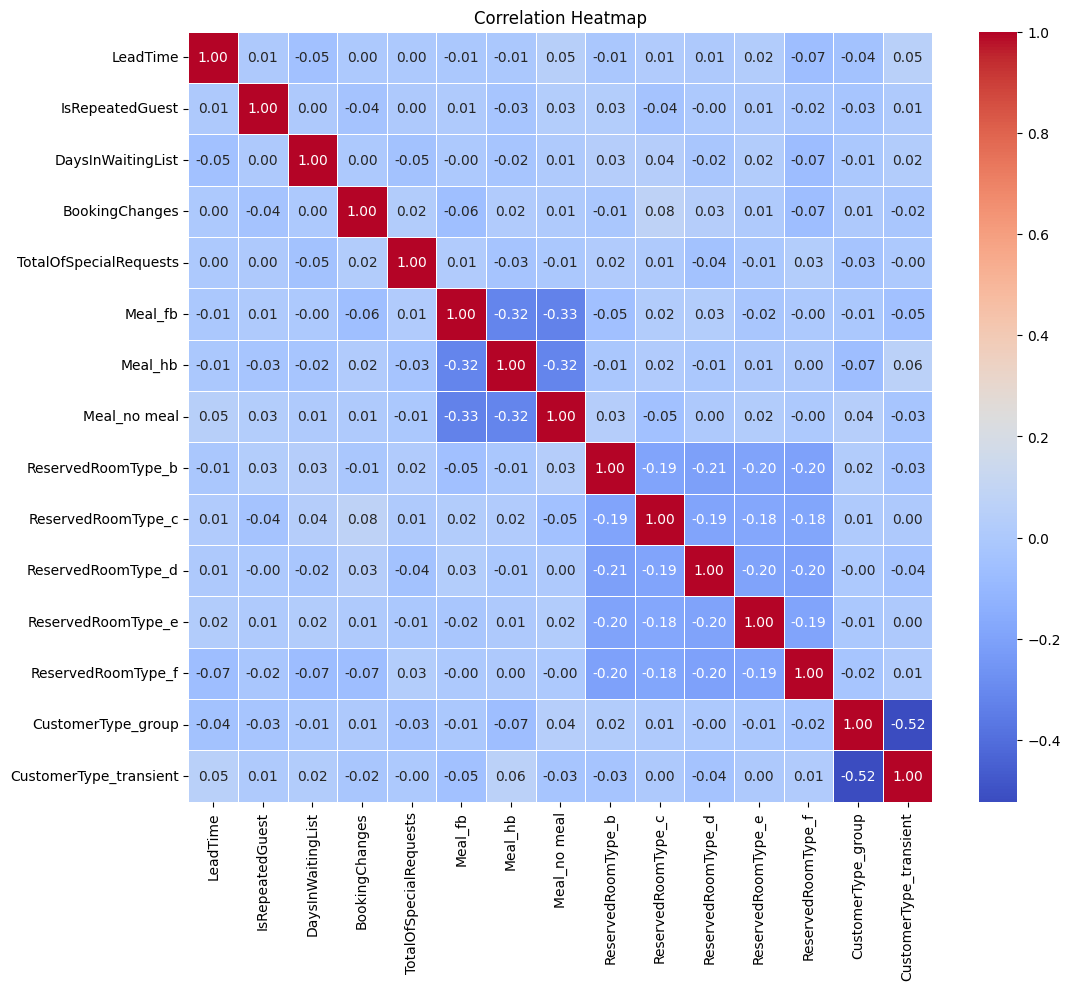

In [30]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# The features does not show high correlation, so we would continue with all the variables

In [32]:
corr_matrix

,LeadTime,IsRepeatedGuest,DaysInWaitingList,BookingChanges,TotalOfSpecialRequests,Meal_fb,Meal_hb,Meal_no meal,ReservedRoomType_b,ReservedRoomType_c,ReservedRoomType_d,ReservedRoomType_e,ReservedRoomType_f,CustomerType_group,CustomerType_transient
LeadTime,1.000000,0.005301,-0.046584,0.000464,0.000192,-0.009675,-0.009226,0.047765,-0.013153,0.014328,0.005358,0.022113,-0.066341,-0.043500,0.054658
IsRepeatedGuest,0.005301,1.000000,0.001390,-0.036997,0.001401,0.011985,-0.027916,0.025405,0.030564,-0.038549,-0.001788,0.010998,-0.018663,-0.027022,0.011170
DaysInWaitingList,-0.046584,0.001390,1.000000,0.000929,-0.045388,-0.002500,-0.023788,0.012053,0.032941,0.036729,-0.021437,0.021154,-0.070767,-0.006569,0.022671
BookingChanges,0.000464,-0.036997,0.000929,1.000000,0.020152,-0.059732,0.016677,0.011745,-0.010941,0.076607,0.032324,0.008074,-0.069232,0.006070,-0.018562
TotalOfSpecialRequests,0.000192,0.001401,-0.045388,0.020152,1.000000,0.014483,-0.030188,-0.009602,0.016181,0.010170,-0.044094,-0.007820,0.030943,-0.032526,-0.003515
Meal_fb,-0.009675,0.011985,-0.002500,-0.059732,0.014483,1.000000,-0.315485,-0.326942,-0.054737,0.023619,0.025985,-0.016897,-0.004211,-0.008050,-0.051408
Meal_hb,-0.009226,-0.027916,-0.023788,0.016677,-0.030188,-0.315485,1.000000,-0.315485,-0.014617,0.017496,-0.009076,0.005536,0.004716,-0.065052,0.063425
Meal_no meal,0.047765,0.025405,0.012053,0.011745,-0.009602,-0.326942,-0.315485,1.000000,0.033696,-0.047475,0.003840,0.024226,-0.004211,0.037840,-0.026660
ReservedRoomType_b,-0.013153,0.030564,0.032941,-0.010941,0.016181,-0.054737,-0.014617,0.033696,1.000000,-0.190374,-0.210319,-0.200705,-0.203391,0.024518,-0.029586
ReservedRoomType_c,0.014328,-0.038549,0.036729,0.076607,0.010170,0.023619,0.017496,-0.047475,-0.190374,1.000000,-0.189896,-0.181216,-0.183641,0.009382,0.002679


# Building the Logistic Regression Model

In [33]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.166328
         Iterations 9
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   IsCanceled        Pseudo R-squared:  0.754      
Date:                 2024-09-26 17:32  AIC:               492.3965   
No. Observations:     1384              BIC:               576.1202   
Df Model:             15                Log-Likelihood:    -230.20    
Df Residuals:         1368              LL-Null:           -933.98    
Converged:            1.0000            LLR p-value:       3.8998e-291
No. Iterations:       9.0000            Scale:             1.0000     
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                  -5.9014   0.7035 -8.3882 0.0000 -7.2803 -4.5225
Lea

In [34]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables

significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
# Remove the constant if it's present
if 'const' in significant_vars:
  significant_vars.remove('const')
print(significant_vars)

['IsRepeatedGuest', 'TotalOfSpecialRequests', 'Meal_no meal']


In [35]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.384721
         Iterations 7
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    IsCanceled        Pseudo R-squared:  0.430      
Date:                  2024-09-26 17:44  AIC:               1070.9065  
No. Observations:      1384              BIC:               1086.6047  
Df Model:              2                 Log-Likelihood:    -532.45    
Df Residuals:          1381              LL-Null:           -933.98    
Converged:             1.0000            LLR p-value:       4.1540e-175
No. Iterations:        7.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
IsRepeatedGuest        -2.5765   0.1695 -15.1992 0.0000 -2.9087

In [36]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [37]:
y_prob

,0
1060,0.710823
546,0.994588
821,0.105082
450,0.500000
1728,0.218739
...,...
1453,0.606944
1780,0.301841
1304,0.923697
1770,0.153487


In [38]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})

In [39]:
print(y_pred_df.head())

     actual_Y  predicted_prob
1060        1        0.710823
546         1        0.994588
821         0        0.105082
450         0        0.500000
1728        0        0.218739


In [40]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
1060        1        0.710823            1
546         1        0.994588            1
821         0        0.105082            0
450         0        0.500000            1
1728        0        0.218739            0


In [41]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[142 110]
 [  0 342]]


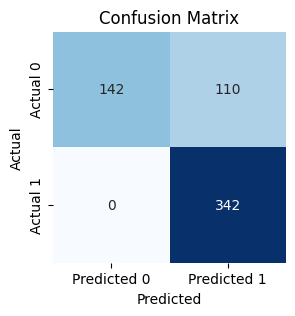

In [43]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 1.00
Accuracy: 0.81


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n Classification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       252
           1       0.76      1.00      0.86       342

    accuracy                           0.81       594
   macro avg       0.88      0.78      0.79       594
weighted avg       0.86      0.81      0.80       594



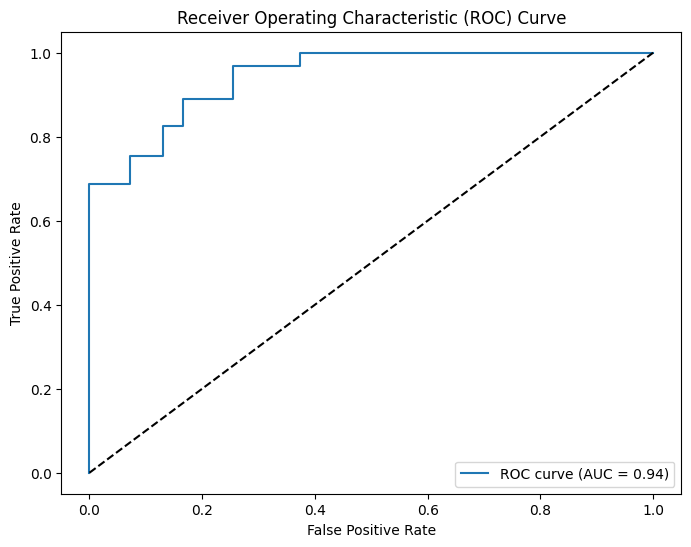

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Estimated Equation

The logistic regression equation is:

logit(P(IsCanceled))=−2.5765×IsRepeatedGuest+0.4345×TotalOfSpecialRequests+0.7557×Meal_no meal

# Model Fit and Recommendations
- Accuracy (81%): The model correctly predicts 81% of the cancellation outcomes.

- Sensitivity (100%): The model perfectly identifies all actual cancellations (no false negatives), which is critical in preventing overbooking or better managing guest expectations.

- Specificity (56%): The model only identifies 56% of the non-cancellations correctly, meaning there is room to improve the ability to accurately predict guests who will not cancel.

- Pseudo R-squared (0.430): This indicates that approximately 43% of the variation in cancellation is explained by the model. While this is moderate, it can still be improved by exploring additional variables.

# Recommendations:
- Improve Specificity:

Explore more variables: Variables such as lead time, market segment, and payment type may improve the model's ability to identify non-cancellations.

# Business Recommendations:

- Personalized engagement: Since repeated guests have a significantly lower likelihood of cancellation (coefficient = -2.5765), focus on customer loyalty programs and targeted marketing to this group.
- Special requests management: Higher special requests are associated with a higher cancellation probability, indicating that better handling or proactive communication regarding special requests might reduce cancellations.
- Meal options review: Guests selecting "no meal" are more likely to cancel. Offering more attractive meal options could help reduce cancellations in this segment.